### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
#импортируем необходимые библиотеки 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#получаем общую информацию о данных с помощью методов info, describe и head
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

Взглянув на общую информацию, мы видим пропуски в столбцах ceiling_height, floors_total, living_area, is_apartment, balcony, kitchen_area, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition. Часть из них удастся заполнить, но что-то возможно лишь выбросить для дальнейшей работы с данными.

Данные в столбцах last_price, floors_total, balcony, parks_around3000, ponds_around3000, days_exposition нужно будет привести к целочисленному типу данных, а данные в first_day_exposition - к datetime.

Оценив данные на наличие пропусков, я могу сказать, что в той их части, что были заполнены автоматически на основе картографических даных, пропусков особенно много: вероятно, это связано с плохой работой алгоритма. Кроме того, существует проблема в области заполняемых пользователями данных: здесь пропуски могут быть обусловлены либо ошибкой при обработке и выгрузке данных, либо пользователи попросту не заполняют их сами.

### Шаг 2. Предобработка данных

In [3]:
#проверка на наличие дублированных строк
print(df.duplicated().sum())
#удаляем строчки с пропусками в столбце locality_name
df.dropna(subset = ['locality_name'], inplace = True)
#проверка
df.info()

0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          14490 non-null float64
floors_total            23565 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            2760 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 12137 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around3

In [4]:
#заполняем пропуски в данных столбца ceiling_height на медианное значение
def fill_ceiling_height(location):
    ceiling_list = df[df['ceiling_height'].notna()]['locality_name'].unique()
    if location in ceiling_list:
        median_value = df[df['locality_name'] == location]['ceiling_height'].median()
    else:
        median_value = df['ceiling_height'].median()
    df.loc[(df['locality_name'] == location) & (df['ceiling_height'].isna()), 'ceiling_height'] = median_value  
for location in df['locality_name'].unique():
    fill_ceiling_height(location)
#проверка    
print(df['ceiling_height'].isna().sum())

0


In [5]:
#заполняем пропуски в данных столбца floors_total на медианное значение
def fill_floors_total(location):
    floors_list = df[df['floors_total'].notna()]['locality_name'].unique()
    if location in floors_list:
        median_value = df[df['locality_name'] == location]['floors_total'].median()
    else:
        median_value = df['floors_total'].median()
    df.loc[(df['locality_name'] == location) & (df['floors_total'].isna()), 'floors_total'] = median_value  
for location in df['locality_name'].unique():
    fill_floors_total(location)
#проверка    
print(df['floors_total'].isna().sum())

0


In [6]:
#заполняем пропуски в данных столбца cityCenters_nearest на медианное значение
def fill_cityCenters_nearest(location):
    distance_list = df[df['cityCenters_nearest'].notna()]['locality_name'].unique()
    if location in distance_list:
        median_value = df[df['locality_name'] == location]['cityCenters_nearest'].median()
    else:
        median_value = df['cityCenters_nearest'].median()
    df.loc[(df['locality_name'] == location) & (df['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = median_value
for location in df['locality_name'].unique():
   fill_cityCenters_nearest(location)
#проверка
print(df['cityCenters_nearest'].isna().sum())

0


In [7]:
#для удобства дальнейшей работы и восприятия данных удалим столбцы с пропусками,
#с которыми мы НЕ будем работать в дальнейшем;
#избавляемся от пропусков в airports_nearest, parks_around3000, parks_nearest,
#ponds_around3000 и ponds_nearest, полностью удалив столбцы
df = df.drop(['airports_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest'], axis=1)
#проверка
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'cityCenters_nearest', 'days_exposition'],
      dtype='object')

In [8]:
#заполняем пропуски в данных столбца is_apartment (меняем на False)
df['is_apartment'] = df['is_apartment'].fillna(False)
#проверка
print(df['is_apartment'].value_counts(dropna=False))

False    23600
True        50
Name: is_apartment, dtype: int64


In [9]:
#заполняем пропуски в данных столбца balcony (меняем на нули)
df['balcony'] = df['balcony'].fillna(0)
#проверка
print(df['balcony'].value_counts(dropna=False))

0.0    15238
1.0     4187
2.0     3658
5.0      304
4.0      182
3.0       81
Name: balcony, dtype: int64


In [10]:
#заполняем пропуски в данных столбца living_area расчетными данными на основе медианных значений living_area и
#total_area для квартир с таким же числом комнат
def fill_living_area(rooms_number):  
    median_living_area_rate = df[df['rooms'] == rooms_number]['living_area'].median() / df[df['rooms'] == rooms_number]['total_area'].median()
    df.loc[(df['rooms'] == rooms_number) & (df['living_area'].isna()), 'living_area'] = median_living_area_rate * df.loc[(df['rooms'] == rooms_number) & (df['living_area'].isna()), 'total_area']
for rooms_number in df['rooms'].unique():
    fill_living_area(rooms_number)
#проверка
print(df['living_area'].isna().sum())

0


In [11]:
#заполняем пропуски в данных столбца kitchen_area расчетными данными на основе медианных значений kitchen_area и
#total_area для квартир с таким же числом комнат (по аналогии с предыдущим шагом)
def fill_kitchen_area(rooms_number):
    if rooms_number == 0:
        df['kitchen_area'] = df['kitchen_area'].fillna(0)
    else:
        median_kitchen_area_rate = df[df['rooms'] == rooms_number]['kitchen_area'].median() / df[df['rooms'] == rooms_number]['total_area'].median()
        df.loc[(df['rooms'] == rooms_number) & (df['kitchen_area'].isna()), 'kitchen_area'] = median_kitchen_area_rate * df.loc[(df['rooms'] == rooms_number) & (df['kitchen_area'].isna()), 'total_area']
for rooms_number in df['rooms'].unique():
    fill_kitchen_area(rooms_number)
#проверка
print(df['kitchen_area'].isna().sum())

0


In [12]:
#заполняем пропуски в данных столбца days_exposition на медианное значение
df.loc[df['days_exposition'].isna(), 'days_exposition'] = df['days_exposition'].median()
#проверка
print(df['days_exposition'].isna().sum())
#итоговая проверка по заполнению пропусков
print(df.info())
df.head()

0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 17 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null float64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
cityCenters_nearest     23650 non-null float64
days_exposition         23650 non-null float64
dtypes: bool(3), float64(9), int64(3), object(2)
memory usage: 2.8+ MB
None


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,False,False,25.000000,0.0,Санкт-Петербург,16028.0,95.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.63,11.0,18.600000,1,False,False,False,11.000000,2.0,посёлок Шушары,18603.0,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.70,5.0,34.300000,4,False,False,False,8.300000,0.0,Санкт-Петербург,13933.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14.0,98.148148,9,False,False,False,20.720165,0.0,Санкт-Петербург,6800.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,False,False,41.000000,0.0,Санкт-Петербург,8098.0,121.0


In [13]:
#меняем тип данных столбцов last_price, floors_total, balcony, days_exposition на целочисленный
def float_to_int(column):
    df[column] = df[column].astype('int')
for column in ['last_price', 'floors_total', 'balcony', 'days_exposition']:
    float_to_int(column)
#меняем тип данных столбца first_day_exposition на datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
#проверка
print(df.dtypes)

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
cityCenters_nearest            float64
days_exposition                  int64
dtype: object


### Вывод

Этап предобработки данных я решил начал с удаления строк с пропусками в столбце locality_name, так как дальнейшее заполнение пропусков основано на связи с населенными пунктами, а заполнить эти пропуски на основе других данных не представлялось возможным. Далее я заполнил пропуски в данных столбцов ceiling_height, floors_total, и cityCenters_nearest - где это возможно - медианными значениями для данного населенного пункта, а где нет - медианными значениями столбца.

Значения столбцов airports_nearest, parks_around3000, parks_nearest, ponds_around3000 и ponds_nearest были не нужны для решения поставленной в проекте задачи, поэтому вместо заполнения пропусков (например, медианными значениями для данных населенных пунктов) я решил просто удалить эти столбцы для экономии времени и ресурсов.

Для заполнения пропусков в столбцах is_apartment и balcony я сделал предположение, что незаполненные пользователями данные означают отрицание/отсутствие элемента. Таким образом, я заполнил пропуски значениями 'False' и нулями соответственно.

Пропуски в столбцах living_area и kitchen_area я заполнил сложным расчетом медианного значения для квартир с таким же числом комнат. Замечу, что для квартир-студий я допустил площадь кухни равную нулю.

Наконец, пропуски в столбце days_exposition я заполнил медианным значением столбца.

В финале этапа предобработки данных я привел данные в столбцах last_price, floors_total, balcony и days_exposition к целочисленному типу данных - для удобства восприятия, а данные в first_day_exposition - к datetime - для дальнейшей работы с ними.

### Шаг 3. Посчитайте и добавьте в таблицу

In [14]:
#для удобства дальнейшей работы добавим в таблицу столбец с ценой продажи, выраженной в миллионах рублей
last_price_mil = df['last_price'] / 1000000
df.insert(loc=2, column='last_price_mil', value=last_price_mil)
#рассчитаем цену квадратного метра и добавим новый столбец
square_metre_price = df['last_price'] / df['total_area']
df.insert(loc=3, column='square_metre_price', value=square_metre_price)

In [15]:
#добавим новые столбцы с днем недели, месяцем и годом публикации объявления
df['weekday'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year
#проверка
print(df['weekday'].value_counts(dropna=False))
print(df['month'].value_counts(dropna=False))
print(df['year'].value_counts(dropna=False))

3    4286
1    4175
4    3992
2    3966
0    3606
5    1933
6    1692
Name: weekday, dtype: int64
2     2639
3     2582
4     2373
11    2367
10    2124
9     1979
6     1755
8     1742
7     1690
12    1638
1     1491
5     1270
Name: month, dtype: int64
2018    8512
2017    8185
2019    2879
2016    2765
2015    1173
2014     136
Name: year, dtype: int64


In [16]:
#добавим новый столбец с описанием этажа, на котором находится квартира
def floor_description(row):
    if row['floor'] == 1:
        return 'Первый'
    elif row['floor'] == row['floors_total']:
        return 'Последний'
    else:
        return 'Другой'
df['floor_description'] = df.apply(floor_description, axis=1)
#проверка
df['floor_description'].value_counts(dropna=False)

Другой       17403
Последний     3335
Первый        2912
Name: floor_description, dtype: int64

In [17]:
#рассчитаем соотношение жилой и общей площади, а также отношение площади кухни к общей, и добавим новые столбцы
living_total_ratio = df['living_area'] / df['total_area']
df.insert(loc=10, column='living_total_ratio', value=living_total_ratio)

kitchen_total_ratio = df['kitchen_area'] / df['total_area']
df.insert(loc=16, column='kitchen_total_ratio', value=kitchen_total_ratio)
#общая проверка для добавленных столбцов
df.head()

,total_images,last_price,last_price_mil,square_metre_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,...,kitchen_area,kitchen_total_ratio,balcony,locality_name,cityCenters_nearest,days_exposition,weekday,month,year,floor_description
0,20,13000000,13.000,120370.370370,108.0,2019-03-07,3,2.70,16,51.000000,...,25.000000,0.231481,0,Санкт-Петербург,16028.0,95,3,3,2019,Другой
1,7,3350000,3.350,82920.792079,40.4,2018-12-04,1,2.63,11,18.600000,...,11.000000,0.272277,2,посёлок Шушары,18603.0,81,1,12,2018,Первый
2,10,5196000,5.196,92785.714286,56.0,2015-08-20,2,2.70,5,34.300000,...,8.300000,0.148214,0,Санкт-Петербург,13933.0,558,3,8,2015,Другой
3,0,64900000,64.900,408176.100629,159.0,2015-07-24,3,2.70,14,98.148148,...,20.720165,0.130316,0,Санкт-Петербург,6800.0,424,4,7,2015,Другой
4,2,10000000,10.000,100000.000000,100.0,2018-06-19,2,3.03,14,32.000000,...,41.000000,0.410000,0,Санкт-Петербург,8098.0,121,1,6,2018,Другой


### Вывод

На этом этапе я рассчитал и добавил в таблицу цену квадратного метра жилья, а также соотношение жилой и общей площади и отношение площади кухни к общей. Кроме того, на основе обновленных данных столбца first_day_exposition я добавил в таблицу новые столбцы с днем недели, месяцем и годом публикации объявления. Наконец, написав и применив функцию, я создал новый столбец с описанием этажа, на котором находится квартира.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

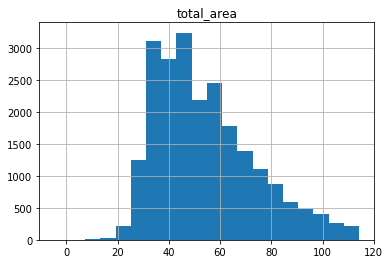

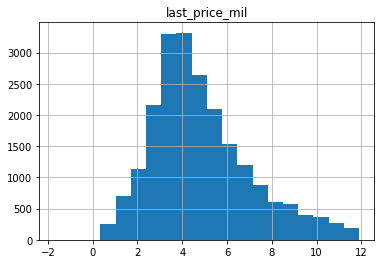

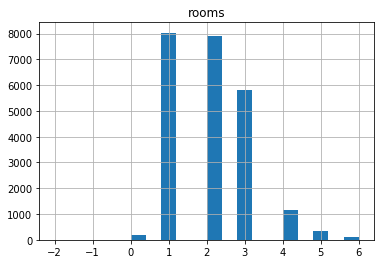

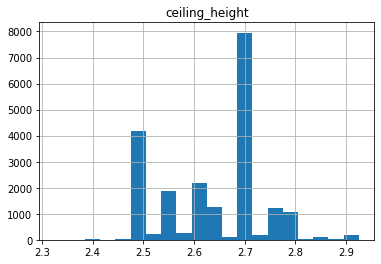

total_area        None
last_price_mil    None
rooms             None
ceiling_height    None
dtype: object

In [18]:
#напишем функцию для постройки гистограммы
def df_hist(column):
    quantiles = column.quantile([0.25,0.5,0.75])
    min_lim = quantiles[0.25] - 1.5*(quantiles[0.75] - quantiles[0.25])
    max_lim = quantiles[0.75] + 1.5*(quantiles[0.75] - quantiles[0.25])
    column.hist(bins=20, range=(min_lim, max_lim)).set_title(column.name)
    plt.show()
#применим созданную функцию для постройки гистограммы для площади, цены (в миллионах), числа комнат и высоты потолков
df_part = df[['total_area', 'last_price_mil', 'rooms', 'ceiling_height']]
df_part.apply(df_hist)

#### Промежуточные выводы

Построив гистограммы для площади, цены (в миллионах), числа комнат и высоты потолков я обнаружил, что все они близки к нормальному распределению, где чаще встречаются средние значения, с одной лишь поправкой: во всех случаях, кроме ceiling_height, я заметил чуть более резкий рост и медленный спад  числа значений.

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Автоматизация процесса построения графиков сделана. 

</div>

Среднее время продажи квартиры: 169.2
Медианное время продажи квартиры: 95.0


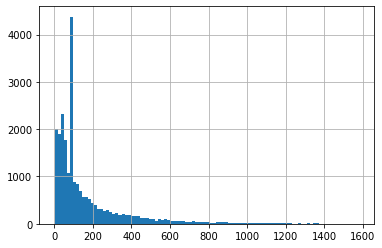

In [19]:
#строим гисторгамму времени продажи квартиры и рассчитываем среднее и медианное время продажи квартиры
df['days_exposition'].hist(bins=100)
print('Среднее время продажи квартиры: {:.1f}'.format(df['days_exposition'].mean()))
print('Медианное время продажи квартиры: {}'.format(df['days_exposition'].median()))

#### Промежуточные выводы

Построив гисторгамму времени продажи квартиры и рассчитав среднее и медианное время продажи квартиры, я пришел к выводу, что абсолютно нормально, если продажа квартиры занимает до 300 дней (это момент, когда на графике образуется плато). На графике также отчетливо видно медиану, которой я заполнял пропуски: ее позиция совпадает с расчетной величиной. Что касается среднего времени продажи, то существует доля очень быстрых продаж (< 80 дней), которая смещает величину вниз и достойна отдельного разбора. Наконец, слишком долгими продажами, исходя из графика, я назвал бы те, что составляют боле 900 дней: на этой точке линия графика сливается с осью абцисс.

30


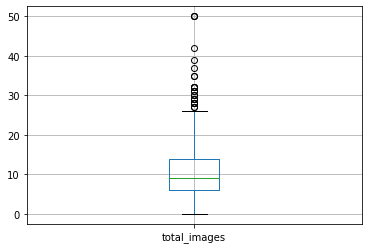

In [20]:
#Убираем вручную редкие и выбивающиеся значения в столбцах, заполненных пользователями
#чистим total_images
df.boxplot(column='total_images')
print(df.query('total_images > 25')['total_images'].count())
df_cleansed = df.query('total_images <= 25')

9


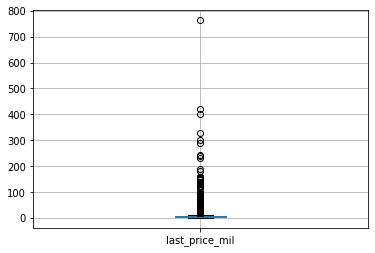

In [21]:
#чистим last_price_mil
df_cleansed.boxplot(column='last_price_mil')
print(df_cleansed.query('last_price_mil > 200')['last_price_mil'].count())
df_cleansed = df_cleansed.query('last_price_mil <= 200')

20


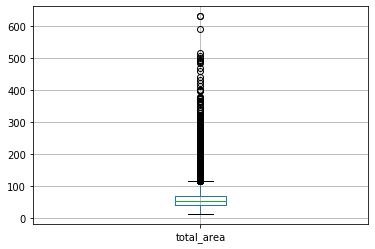

In [22]:
#чистим total_area
df_cleansed.boxplot(column='total_area')
print(df_cleansed.query('total_area >= 400')['total_area'].count())
df_cleansed = df_cleansed.query('total_area < 400')

4


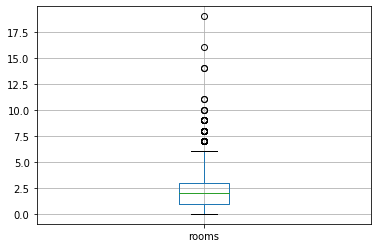

In [23]:
#чистим rooms
df_cleansed.boxplot(column='rooms')
print(df_cleansed.query('rooms > 11')['rooms'].count())
df_cleansed = df_cleansed.query('rooms <= 11')

29


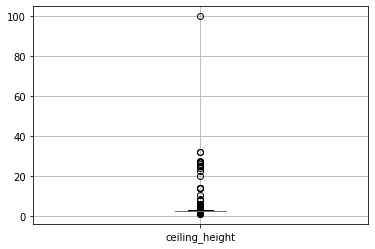

In [24]:
#чистим ceiling_height
df_cleansed.boxplot(column='ceiling_height')
print(df_cleansed.query('ceiling_height > 10')['ceiling_height'].count())
df_cleansed = df_cleansed.query('ceiling_height <= 10')

2


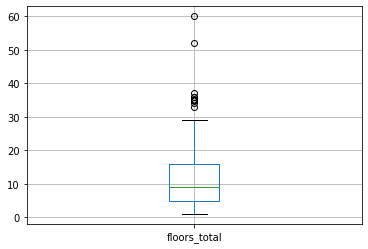

In [25]:
#чистим floors_total
df_cleansed.boxplot(column='floors_total')
print(df_cleansed.query('floors_total > 40')['floors_total'].count())
df_cleansed = df_cleansed.query('floors_total <= 40')

16


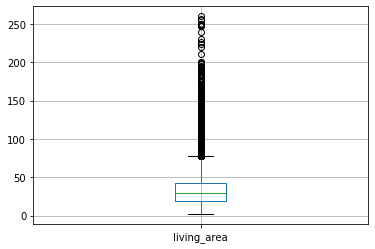

In [26]:
#чистим living_area
df_cleansed.boxplot(column='living_area')
print(df_cleansed.query('living_area > 200')['living_area'].count())
df_cleansed = df_cleansed.query('living_area <= 200')

9


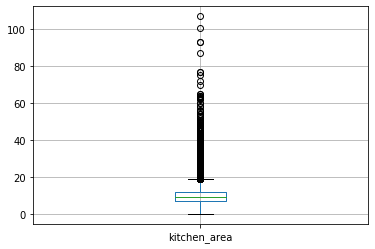

In [27]:
#чистим kitchen_area
df_cleansed.boxplot(column='kitchen_area')
print(df_cleansed.query('kitchen_area > 70')['kitchen_area'].count())
df_cleansed = df_cleansed.query('kitchen_area <= 70')

#### Промежуточные выводы

Убирая из данных редкие и выбивающиеся значения в столбцах, заполненных пользователями (total_images, last_price_mil, total_area, rooms, ceiling_height, floors_total, living_area, kitchen_area) я обратил внимание на то, что часть значений явно завышена, притом некоторые из них выглядят очень подозрительно: это так называемые "красивые числа" - кратные 10. Конечно, выбивающиеся значения могут быть правдивыми, и за ними могут скрываться особняки с 20 комнатами, но нельзя отрицать что часть данных была заполнена с ошибкой, а, значит, выбросы могли помешать дальнейшему анализу.

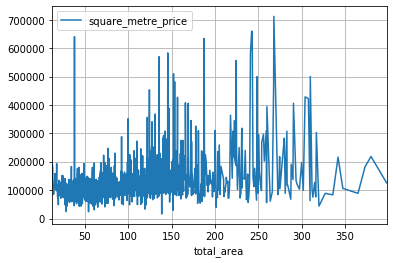

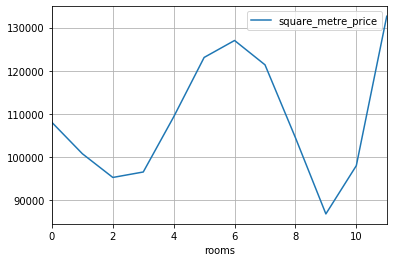

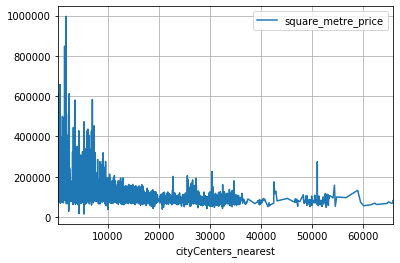

In [28]:
df = df_cleansed
#напишем функцию для вывода графика зависимости цены квадратного метра от метража квартиры, числа комнат и удалённости от центра
def df_plot(list):
    for i in list:
        df.pivot_table(index=i, values='square_metre_price').plot(grid=True)
        plt.show()
#применим созданную функцию
df_part = ['total_area', 'rooms', 'cityCenters_nearest']
df_plot(df_part)

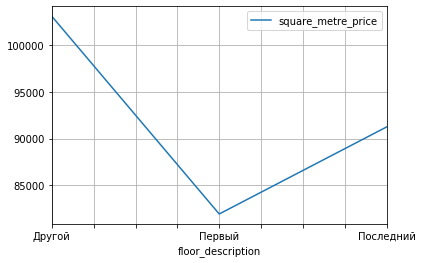

In [29]:
#выводим график зависимости цены квадратного метра от того, на каком этаже расположена квартира: первом, последнем или другом
df.pivot_table(index='floor_description', values='square_metre_price').plot(grid=True)

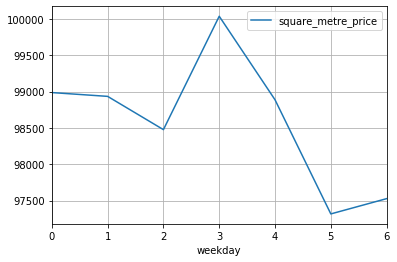

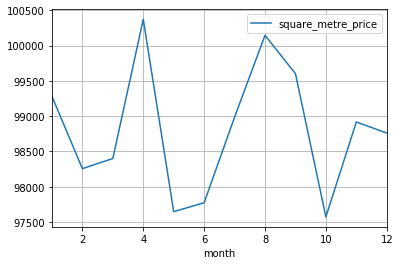

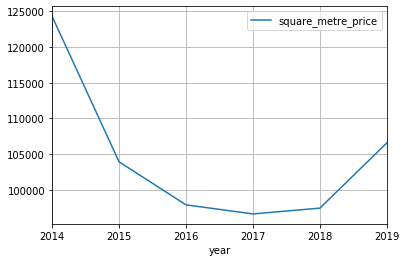

In [30]:
#выводим график зависимости цены квадратного метра от даты размещения: дня недели, месяца и года, применив созданную выше функцию
df_part = ['weekday', 'month', 'year']
df_plot(df_part)

#### Промежуточные выводы

Закончив с обработкой выбросов, я перешел к оценке факторов, больше всего влияющих на стоимость квартиры, и пришел к следующим выводам:

- нижняя планка цены квадратного метра практически не меняется в зависимости от общей площади жилья, однако, с ростом числа квардатных метров растут и аппетиты у тех, кто их продает;
    
- за исключением подозрительных выбросов (студии (rooms=0) и квартиры с 9 и 11 комнатами) можно сказать, что мы наблюдаем нормальное распределение, и максимальную цену квардатного метра можно встретить у квартир с числом комнат в районе 6;
- в основной массе близость к центру приводит к росту стоимости квадратного метра жилья;
    
- наименьшим спросом и, следовательно, меньшей ценой квадратного метра жилья обладают квартиры на первом этаже. Следом идут квартиры на последнем, и самую высокую цену имеют квартиры между первым и последним этажами;
    
- больше всего за один квадратный метр просят, когда размещают объявление в четверг, а меньше всего - на выходных;
    
- у объявлений, размещенных в апреле и августе, цена квадратного метра выше всего, а у тех, что размещены в мае, июне и октябре - ниже;
    
- на промежутке с 2014-го по 2017-й годы цена квадратного метра падала (сильнее всего - в первый год), а затем стала расти: в первый год - незначительно, а в 2018-ом - существенно.

In [31]:
#рассчитываем коэффициент корреляции для вcех столбцов датафрейма
#для удобства восприятия выводим только нобходимый столбец - цена квадратного метра
correlation = df.corr()['square_metre_price']
print(correlation)

total_images           0.136436
last_price             0.747047
last_price_mil         0.747047
square_metre_price     1.000000
total_area             0.279181
rooms                  0.028661
ceiling_height         0.322551
floors_total           0.171355
living_area            0.200984
living_total_ratio    -0.152687
floor                  0.142001
is_apartment           0.037201
studio                 0.018632
open_plan              0.008101
kitchen_area           0.366832
kitchen_total_ratio    0.146456
balcony                0.022879
cityCenters_nearest   -0.268334
days_exposition        0.033086
weekday               -0.007069
month                 -0.000165
year                   0.011907
Name: square_metre_price, dtype: float64


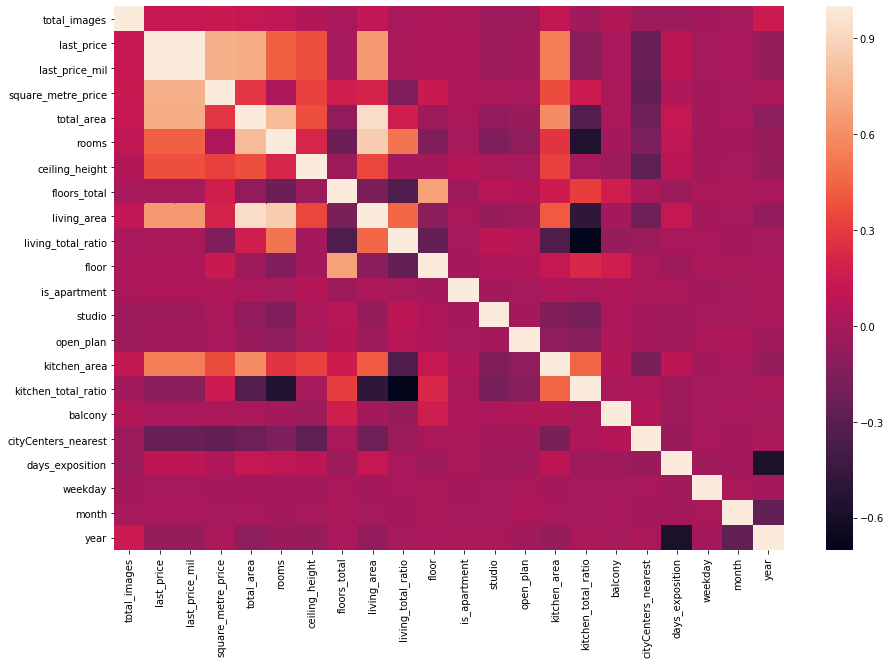

In [32]:
#визуализируем получившуюся матрицу с помощью тепловой карты
plt.subplots(figsize=(15,10)) 
sns.heatmap(df.corr())

#### Промежуточные выводы

Расчет коэффициента корреляции показал, что наибольшей взаимосвязью с ценой квадратного метра обладают цена на момент снятия объявления и, соответственно, она же, выраженная в миллионах. Корреляция данных параметров высокая - почти 0.75. Корреляция прочих параметров с ценой квадратного метра низкая или крайне низкая.

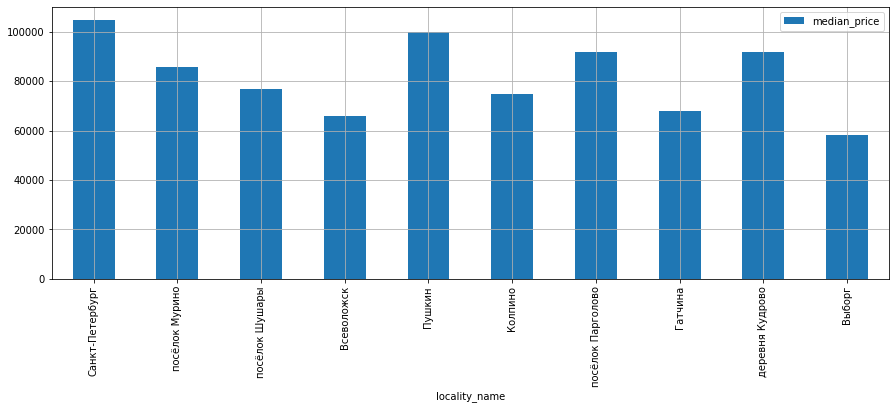

In [33]:
#определяем 10 населённых пунктов с наибольшим числом объявлений и высчитываем для них среднюю цену квадратного метра
top10_locality = df['locality_name'].value_counts().head(10)
top10_df = pd.DataFrame(data = top10_locality, columns = ['square_metre_price', 'locality_name']).reset_index()
top10_df.rename(columns={'index': 'locality_name', 'locality_name': 'square_metre_price', 'square_metre_price': 'median_price'}, inplace=True)
def median_price_count(row):
    row['median_price'] = df[df['locality_name'] == row['locality_name']]['square_metre_price'].median()
    return row
top10_df = top10_df.apply(median_price_count, axis=1)
top10_df.plot(x='locality_name', y='median_price', figsize=(15,5), kind='bar', grid=True)

#### Промежуточные выводы

Среди 10 населённых пунктов с наибольшим числом объявлений наибольшей средней ценой квадратного метра обладает Санкт-Петербург, а наименьшей - Выборг.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


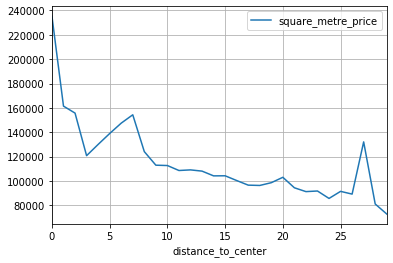

In [34]:
#создаем столбец с расстоянием до центра в километрах и рассчитываем среднюю цену квадратного метра для каждого километра
df_spb = df.query('locality_name == "Санкт-Петербург"')
df_spb['distance_to_center'] = round(df_spb['cityCenters_nearest'] / 1000)
#строим график зависимости цены квадратного метра от удалённости от центра и определяем границу центральной зоны
df_spb.pivot_table(index='distance_to_center', values='square_metre_price').plot(grid=True)
center_border = 7

#### Промежуточные выводы

На основе построенного графика зависимости цены квадратного метра от удалённости от центра я определил границу центральной зоны равной семи километрам.

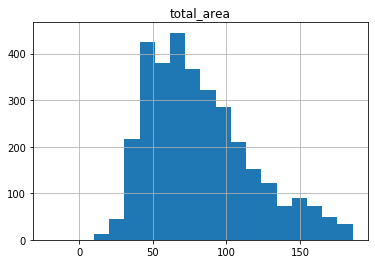

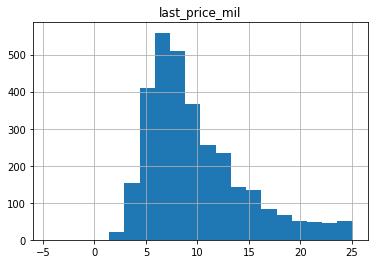

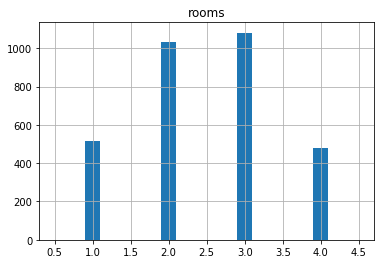

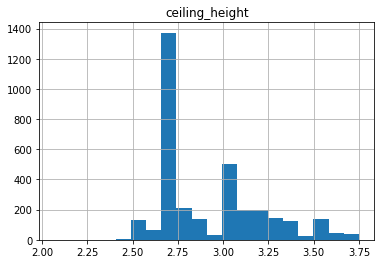

total_area        None
last_price_mil    None
rooms             None
ceiling_height    None
dtype: object

In [35]:
#выделяем сегмент квартир в центре и изучаем следующие параметры: площадь, цена, число комнат, высота потолков
df_center = df_spb.query('distance_to_center <= @center_border')
df_part = df_center[['total_area', 'last_price_mil', 'rooms', 'ceiling_height']]
#для построения гистограмм применяем написанную ранее функцию
df_part.apply(df_hist)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


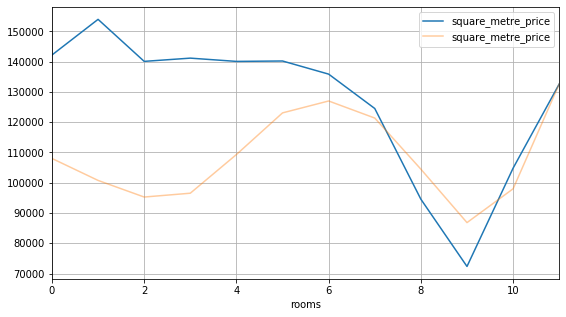

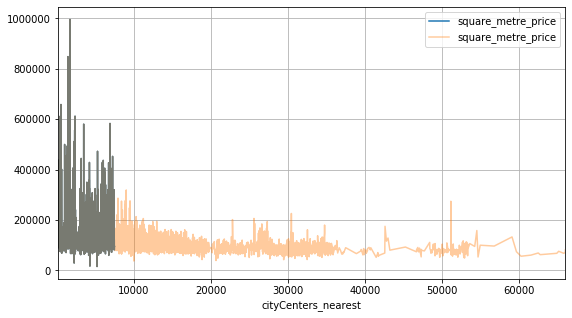

In [36]:
#напишем функцию для вывода графика зависимости цены квадратного метра от числа комнат, удалённости от центра
def df_center_plot(list):
    for i in list:
        plt.subplots(figsize = (20, 5))
        df_center.pivot_table(index=i, values='square_metre_price').plot(grid=True, ax=plt.subplot(122))
        df.pivot_table(index=i, values='square_metre_price').plot(grid=True, ax=plt.subplot(122), alpha=0.4)
        plt.show()
#применим созданную функцию
df_center_part = ['rooms', 'cityCenters_nearest']
df_center_plot(df_center_part)

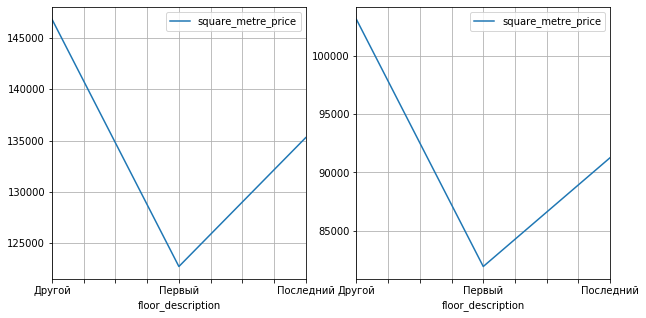

In [37]:
#выводим график зависимости цены квадратного метра от того,
#на каком этаже расположена квартира: первом, последнем или другом
#сравниваем с данными по региону
plt.subplots(figsize = (10, 5))
df_center.pivot_table(index='floor_description', values='square_metre_price').plot(grid=True, ax=plt.subplot(121))
df.pivot_table(index='floor_description', values='square_metre_price').plot(grid=True, ax=plt.subplot(122))
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


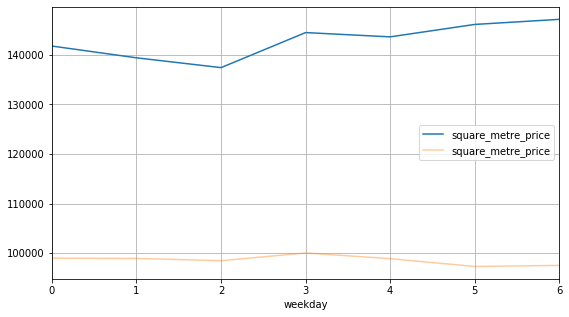

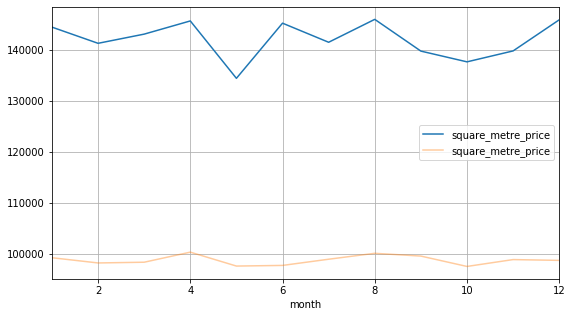

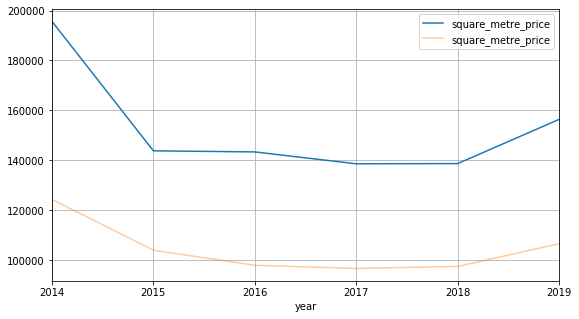

In [38]:
#выводим график зависимости цены квадратного метра от даты размещения: дня недели, месяца и года, применив созданную выше функцию
df_center_part = ['weekday', 'month', 'year']
df_center_plot(df_center_part)

In [39]:
#рассчитываем коэффициент корреляции для вcех столбцов датафрейма
#для удобства восприятия выводим только нобходимый столбец - цена квадратного метра
correlation = df_center.corr()['square_metre_price']
print(correlation)

total_images           0.165290
last_price             0.772613
last_price_mil         0.772613
square_metre_price     1.000000
total_area             0.204924
rooms                 -0.054478
ceiling_height         0.084819
floors_total           0.131516
living_area            0.125787
living_total_ratio    -0.154948
floor                  0.122339
is_apartment           0.070473
studio                -0.000236
open_plan              0.008097
kitchen_area           0.302874
kitchen_total_ratio    0.134144
balcony                0.137330
cityCenters_nearest   -0.000937
days_exposition        0.014798
weekday                0.027370
month                 -0.007683
year                   0.003809
distance_to_center    -0.004985
Name: square_metre_price, dtype: float64


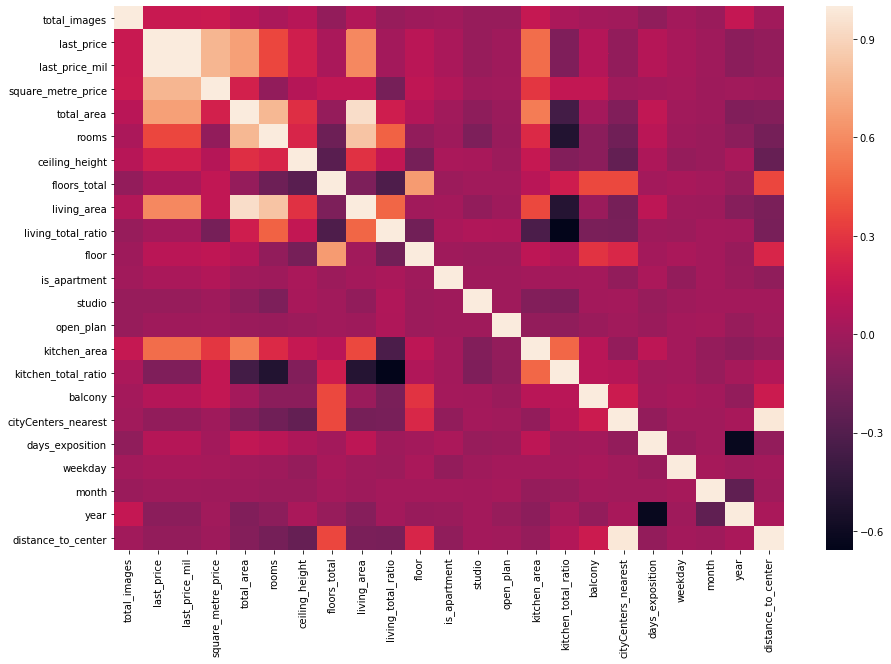

In [40]:
#визуализируем получившуюся матрицу с помощью тепловой карты
plt.subplots(figsize=(15,10)) 
sns.heatmap(df_center.corr())

#### Промежуточный вывод

Как и в случае данных целого региона наибольшей корреляцией с ценой квадратного метра обладают цена на момент снятия объявления и она же, выраженная в миллионах. Корреляция прочих параметров стала еще ниже.

### Вывод

Определив центральную зону Санкт-Петербурга и построив гистограммы для площади, цены (в миллионах), числа комнат и высоты потолков я обнаружил, что графики идентичны тем, что отражают данные по городу с той лишь разницей, что пиковых значений они достигают на больших величинах: площади и число комнат - больше, а цены и потолки - выше.

Оценив факторы, больше всего влияющих на стоимость квартиры в центре Санкт-Петербурга, я пришел к следующим выводам:

- в отличие от зависимости цены квадратного метра от числа комнат вцелом по городу эта величина в центре держится примерно на одном уровне, кроме всплеска у однокомнатных квартир и провала у квартир с 8 и 9 комнатами;
    
- по сравнению с соответствующей величиной по городу зависимость цены квадратного метра от близости к центру выражена гораздо меньше, однако все равно заметна на отрезке до двух километров;
    
- как и в случае всего города меньшей ценой квадратного метра жилья обладают квартиры на первом этаже. Следом идут квартиры на последнем, и самую высокую цену имеют квартиры между первым и последним этажами;
    
- что касается объявлений, размещенных в четверг, здесь статистика центра повторяет общую, и цена квадратного метра выше, чем в другие дни, кроме - неожиданный поворот - выходных: в эти дни размещают самые дорогие квадратные метры в центре города;
    
- тут также ситуация во многом схожая: у объявлений, размещенных в апреле, июне, августе и декабре, цена квадратного метра выше всего, а у тех, что размещены в мае, и октябре - ниже;
    
- квадратные метры в центре так же, как и вцелом по городу теряли в цене на промежутке с 2014-го по 2017-й годы (и опять же, сильнее всего - в первый год), разница лишь в том, что рост наметился позже - в 2018-м - зато такой же стремительный.

### Шаг 5. Общий вывод

Оценив первоначальные данные, я могу сказать, что определенно требуют доработки алгоритмы сервиса, заполнявшие данные на основании геолокации: среди этих данных было множество пропусков, но, к счастью, для анализа они не были нужны. Кроме того, существует проблема корректности заполняемых пользователями данных. Здесь речь не только о пропусках, но и о заведомо ложных данных.

Передобработка данных заняла существенное время, и этого можно было бы избежать, решив вышеназванные мной проблемы.

Наконец, проанализировав ситуацию на рынке недвижимости Санкт-Петербурга, я пришел к выводу, что:

- в СПб и Ленобласти больше всего продается квартир площадью от 30 до 50 м2, а в центре СПб - от 40 до 70 м2;
    
- в СПб и Ленобласти чаще всего в продаже встречаются квартиры стоимостью от 3 до 4.5 млн. руб., а в центре СПб - от 4 до 7 млн. руб.;
    
- в СПб и Ленобласти чаще всего продаются одно- и двухкомнатные квартиры, а в ценрте СПб - двух- и трехкомнатные;
    
- в СПб и Ленобласти высота потолков продаваемых квартир вцелом ниже: 2.5 - 2.7 метров, в то время как в центре СПб - 2.7 - 3 метра;
    
В среднем продажа квартиры занимает 170 дней, и более того, существует 50%-й шанс продать ее еще быстрее - меньше, чем за 100 дней. Однако, если покупатель не найдется через 1000 дней после публикации объявления - это довольно плохой знак.

Среди 10 населённых пунктов с наибольшим числом объявлений наибольшей средней ценой квадратного метра обладает Санкт-Петербург, а наименьшей - Выборг.

Сравнив факторы, больше всего влияющие на стоимость квартиры в СПб и Ленобласти и центре Санкт-Петербурга, я пришел к следующим выводам:

- влияние числа комнат на цену квадратного метра выше для Спб и ЛО,чем для центра, и достигает своего пика у 6-комнатных квартир;

- в обоих случаях чем ближе к центру, тем дороже, однако, в радиусе семи километров от центра заметить разницу будет сложнее;

- нигде не любят жить на первых и последних этажах - цены подтверждают это;

- квадратные метры у объявлений, опубликованных в четверг, дорогие в обоих случаях, но есть интресная особенность: те, что опубликованы в выходные в центре СПб - еще дороже, а в те же дни в Ленобласти, наоборот - самые дешевые;

- повсеместно в апреле и августе размещаются к продаже самые дорогие квадратные метры, а в мае и октябре - самые дешевые;

- в обоих случаях цена квадратного метра жилья падала с 2014-го по 2017-й годы - особенно в 2014-м, и лишь к 2018-му году цены поползли вверх.